In [ ]:
import os
import zipfile
import tensorflow as tf

# Download dataset from Github
url = "https://github.com/Peco602/brain-stroke-detection-3d-cnn/releases/download/v0.0.1/brain_ct_data.zip"
filename = os.path.join(os.getcwd(), "brain_ct_data.zip")
tf.keras.utils.get_file(filename, url)

# Unzip dataset
with zipfile.ZipFile("brain_ct_data.zip", "r") as z_fp:
    z_fp.extractall(".")

63160014/63160014 [==============================] - 0s 0us/step


In [ ]:
!ls -al brain_ct_data

total 92
drwxr-xr-x 4 root root  4096 Apr 30 19:06 .
drwxr-xr-x 1 root root  4096 Apr 30 19:06 ..
drwxr-xr-x 2 root root 49152 Apr 30 19:06 Normal
drwxr-xr-x 2 root root 36864 Apr 30 19:06 Stroke


In [ ]:
!ls brain_ct_data/Normal | head

100 (10).jpg
100 (11).jpg
100 (12).jpg
100 (13).jpg
100 (14).jpg
100 (15).jpg
100 (16).jpg
100 (17).jpg
100 (18).jpg
100 (19).jpg


In [ ]:
!ls brain_ct_data/Stroke | head

58 (10).jpg
58 (11).jpg
58 (12).jpg
58 (13).jpg
58 (15).jpg
58 (17).jpg
58 (18).jpg
58 (19).jpg
58 (1).jpg
58 (20).jpg


In [ ]:
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import numpy as np

def plot_scan_from_path(slices_path, patient_id):
    """Plot 40 slices for a patient ID"""
    num_rows = 4
    num_columns = 10
    factor = 1.2
    f, axarr = plt.subplots(
        num_rows,
        num_columns,
        figsize=(num_columns*factor, num_rows*factor),
    )
    f.suptitle(f"Patient {patient_id}", y=1.1)
    image_id = 1
    for i in range(num_rows):
        for j in range(num_columns):
          try:
            img = imageio.imread(f'{slices_path}/{patient_id} ({image_id}).jpg')
          except Exception as e:
            print(e)
            img = np.zeros((2,2))
          finally:
            axarr[i, j].imshow(img, cmap='gray')
            axarr[i, j].axis('off')
            image_id += 1
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.show()


No such file: '/content/brain_ct_data/Normal/49 (34).jpg'
No such file: '/content/brain_ct_data/Normal/49 (35).jpg'
No such file: '/content/brain_ct_data/Normal/49 (36).jpg'
No such file: '/content/brain_ct_data/Normal/49 (37).jpg'
No such file: '/content/brain_ct_data/Normal/49 (38).jpg'
No such file: '/content/brain_ct_data/Normal/49 (39).jpg'
No such file: '/content/brain_ct_data/Normal/49 (40).jpg'


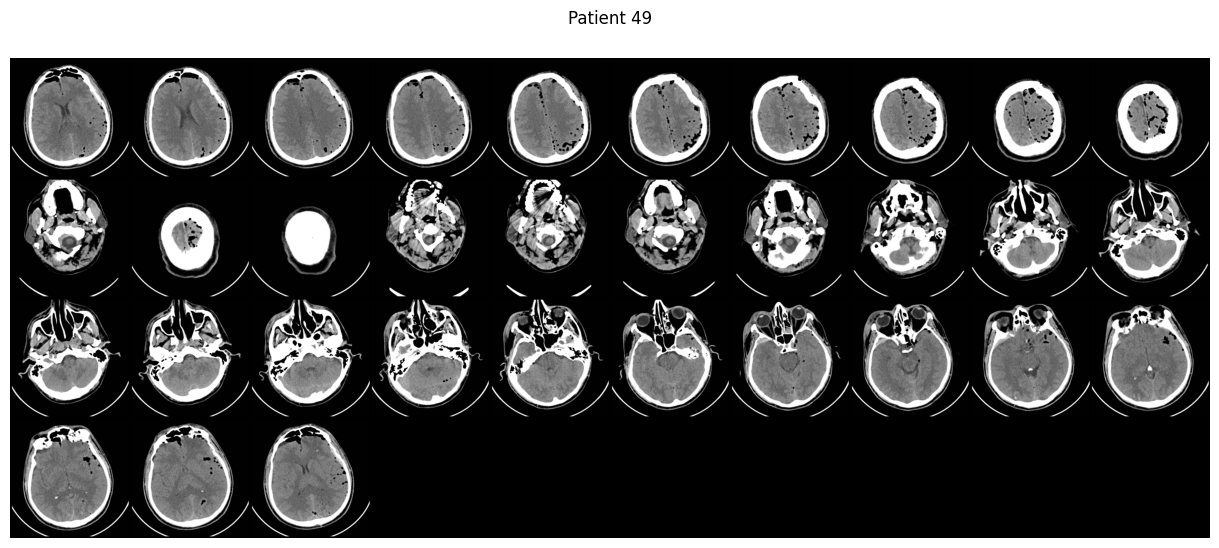

In [ ]:

plot_scan_from_path(slices_path='brain_ct_data/Normal', patient_id=49)

No such file: '/content/brain_ct_data/Normal/50 (13).jpg'
No such file: '/content/brain_ct_data/Normal/50 (15).jpg'
No such file: '/content/brain_ct_data/Normal/50 (17).jpg'
No such file: '/content/brain_ct_data/Normal/50 (19).jpg'
No such file: '/content/brain_ct_data/Normal/50 (21).jpg'
No such file: '/content/brain_ct_data/Normal/50 (23).jpg'
No such file: '/content/brain_ct_data/Normal/50 (25).jpg'
No such file: '/content/brain_ct_data/Normal/50 (27).jpg'
No such file: '/content/brain_ct_data/Normal/50 (29).jpg'
No such file: '/content/brain_ct_data/Normal/50 (31).jpg'
No such file: '/content/brain_ct_data/Normal/50 (33).jpg'
No such file: '/content/brain_ct_data/Normal/50 (35).jpg'
No such file: '/content/brain_ct_data/Normal/50 (39).jpg'
No such file: '/content/brain_ct_data/Normal/50 (40).jpg'


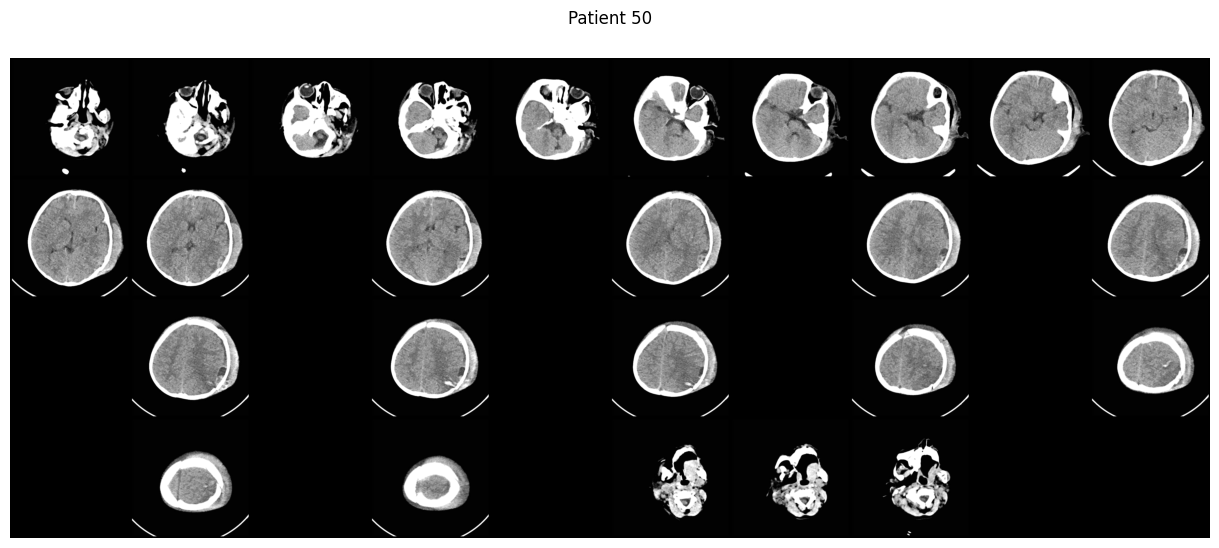

In [ ]:
plot_scan_from_path(slices_path='brain_ct_data/Normal', patient_id=50)

In [ ]:
INPUT_PATH='brain_ct_data'
OUTPUT_PATH='brain_ct_data_fixed'
NORMAL_INPUT_PATH=f'{INPUT_PATH}/Normal'
NORMAL_OUTPUT_PATH=f'{OUTPUT_PATH}/Normal'
STROKE_INPUT_PATH=f'{INPUT_PATH}/Stroke'
STROKE_OUTPUT_PATH=f'{OUTPUT_PATH}/Stroke'

NORMAL_SORTING_CONFIG = {
    49:  [14, 15, 16, 11, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13],
    50:  [36, 37, 38, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34],
    51:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50],
    52:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
    53:  [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 28, 29, 31, 33, 35, 37, 39, 41, 43, 1, 2, 3, 4],
    54:  [20, 21, 22, 23, 24, 25, 26, 27, 28, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
    55:  [30, 31, 32, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
    56:  [33, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
    57:  [32, 33, 34, 35, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
    59:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
    60:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
    61:  [25, 26, 27, 28, 29, 30, 31, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
    62:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
    63:  [33, 34, 35, 36, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
    64:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
    65:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    95:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
    96:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
    98:  [29, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
    99:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
    100: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    101: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
    102: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
    103: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
    104: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
    105: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    106: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
    107: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    108: [25, 26, 27, 28, 29, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
    109: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
    110: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
    111: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
    112: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
    113: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
    114: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
    115: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
    116: [31, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    117: [29, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
    118: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    119: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
    120: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    121: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    122: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
    123: [39, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38],
    124: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    125: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
    126: [30, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
    127: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
    128: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
    129: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    130: [26, 27, 28, 29, 30, 31, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
}

STROKE_SORTING_CONFIG = {
    58: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36],
    66: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 38, 39, 40, 41],
    67: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 23, 25, 27, 28, 29, 30, 31, 32, 33],
    68: [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36],
    69: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36],
    70: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 42, 43, 44, 45, 46, 47, 48],
    71: [48, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46],
    72: [31, 32, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    73: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 32, 34, 36, 38, 39],
    74: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 18, 20, 22, 23, 25, 27, 29, 31, 33, 35, 37, 39, 40, 41, 42, 43, 44, 45, 46],
    75: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 49],
    76: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 40, 41, 42, 43],
    77: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43],
    78: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 17, 19, 21, 23, 25, 26, 28, 30, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42],
    79: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
    80: [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 14, 15, 16, 18, 20, 22, 24, 26, 28, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40],
    81: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 44],
    82: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
    83: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 29, 31, 33, 35, 36, 37, 38, 1, 2, 3, 4],
    84: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 22, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
    85: [21, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 16, 17, 18, 19, 20],
    86: [31, 32, 33, 34, 35, 36, 1, 2, 3, 4, 6, 8, 10, 12, 14, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    87: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 40, 41, 42, 43, 44],
    88: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 28, 30, 32, 34, 35, 36, 37],
    89: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 23, 25, 27, 29, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43],
    90: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
    91: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 19, 21, 23, 25, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
    92: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 19, 20, 21, 23, 25, 27, 29, 31, 32, 33, 34, 36, 38, 40, 42],
    93: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 22, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36],
    94: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 44, 45, 46],
    97: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 35, 36, 37, 38, 39, 40],
}

In [ ]:
import os
import shutil

def sort_slices(input_path, output_path, patient_id, order):
  """Copy the slices in the correct order"""
  # Create output folder for sorted images (if it does not exist)
  if not os.path.exists(output_path):
    os.makedirs(output_path, exist_ok=True)

  # Move the image to the output path with a name based on the correct sorting order
  for new_id in range(1, len(order)+1):
    old_id = order[new_id-1]
    shutil.copyfile(f'{input_path}{os.sep}{patient_id} ({old_id}).jpg', f'{output_path}{os.sep}{patient_id} ({new_id}).jpg')


# Normal slices sorting
for patient_id, order in NORMAL_SORTING_CONFIG.items():
    sort_slices(
      input_path=NORMAL_INPUT_PATH,
      output_path=NORMAL_OUTPUT_PATH,
      patient_id=patient_id,
      order=order)

# Stroke slices sorting
for patient_id, order in STROKE_SORTING_CONFIG.items():
    sort_slices(
      input_path=STROKE_INPUT_PATH,
      output_path=STROKE_OUTPUT_PATH,
      patient_id=patient_id,
      order=order)

No such file: '/content/brain_ct_data_fixed/Normal/49 (34).jpg'
No such file: '/content/brain_ct_data_fixed/Normal/49 (35).jpg'
No such file: '/content/brain_ct_data_fixed/Normal/49 (36).jpg'
No such file: '/content/brain_ct_data_fixed/Normal/49 (37).jpg'
No such file: '/content/brain_ct_data_fixed/Normal/49 (38).jpg'
No such file: '/content/brain_ct_data_fixed/Normal/49 (39).jpg'
No such file: '/content/brain_ct_data_fixed/Normal/49 (40).jpg'


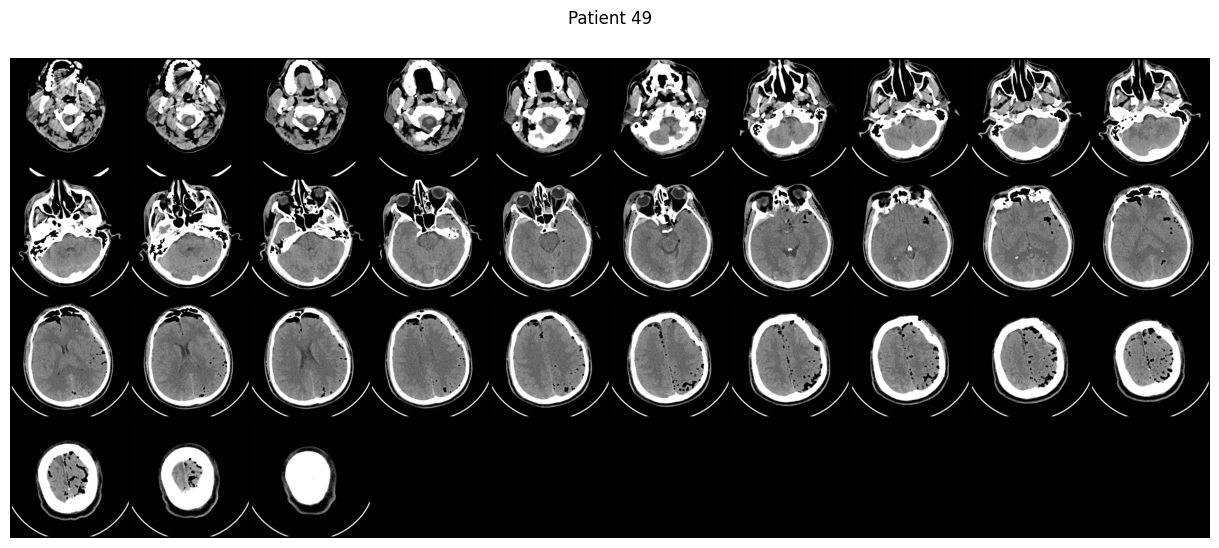

In [ ]:
plot_scan_from_path(slices_path=NORMAL_OUTPUT_PATH, patient_id=49)


No such file: '/content/brain_ct_data_fixed/Normal/50 (27).jpg'
No such file: '/content/brain_ct_data_fixed/Normal/50 (28).jpg'
No such file: '/content/brain_ct_data_fixed/Normal/50 (29).jpg'
No such file: '/content/brain_ct_data_fixed/Normal/50 (30).jpg'
No such file: '/content/brain_ct_data_fixed/Normal/50 (31).jpg'
No such file: '/content/brain_ct_data_fixed/Normal/50 (32).jpg'
No such file: '/content/brain_ct_data_fixed/Normal/50 (33).jpg'
No such file: '/content/brain_ct_data_fixed/Normal/50 (34).jpg'
No such file: '/content/brain_ct_data_fixed/Normal/50 (35).jpg'
No such file: '/content/brain_ct_data_fixed/Normal/50 (36).jpg'
No such file: '/content/brain_ct_data_fixed/Normal/50 (37).jpg'
No such file: '/content/brain_ct_data_fixed/Normal/50 (38).jpg'
No such file: '/content/brain_ct_data_fixed/Normal/50 (39).jpg'
No such file: '/content/brain_ct_data_fixed/Normal/50 (40).jpg'


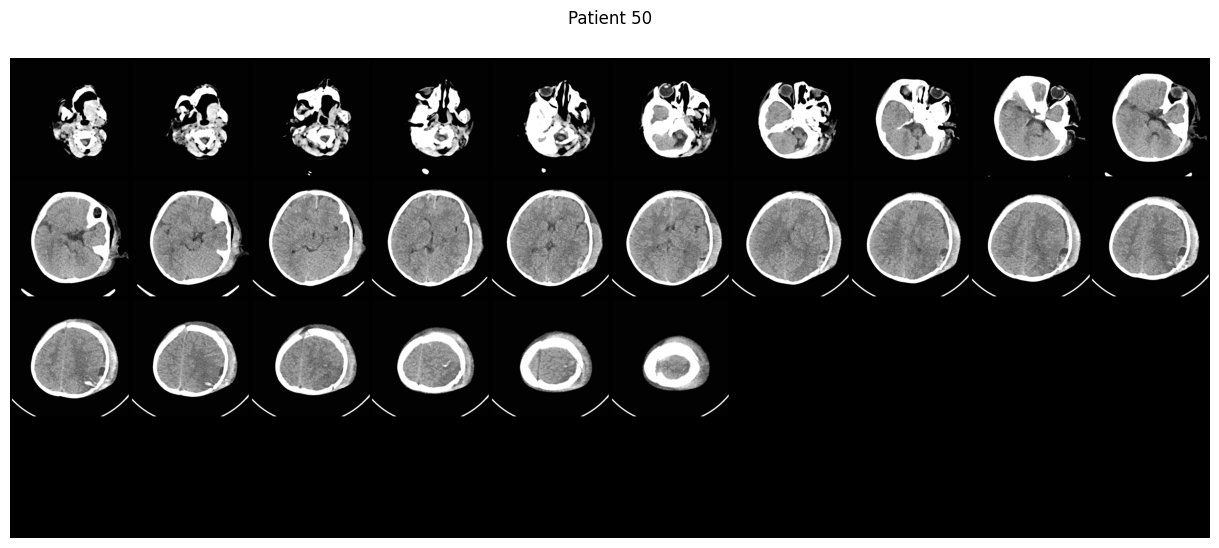

In [ ]:
plot_scan_from_path(slices_path=NORMAL_OUTPUT_PATH, patient_id=50)


In [ ]:
!zip -r brain_ct_data_fixed.zip brain_ct_data_fixed


  adding: brain_ct_data_fixed/ (stored 0%)
  adding: brain_ct_data_fixed/Stroke/ (stored 0%)
  adding: brain_ct_data_fixed/Stroke/88 (29).jpg (deflated 14%)
  adding: brain_ct_data_fixed/Stroke/73 (30).jpg (deflated 25%)
  adding: brain_ct_data_fixed/Stroke/71 (1).jpg (deflated 11%)
  adding: brain_ct_data_fixed/Stroke/90 (17).jpg (deflated 8%)
  adding: brain_ct_data_fixed/Stroke/80 (24).jpg (deflated 15%)
  adding: brain_ct_data_fixed/Stroke/93 (30).jpg (deflated 14%)
  adding: brain_ct_data_fixed/Stroke/93 (12).jpg (deflated 5%)
  adding: brain_ct_data_fixed/Stroke/85 (6).jpg (deflated 17%)
  adding: brain_ct_data_fixed/Stroke/79 (3).jpg (deflated 17%)
  adding: brain_ct_data_fixed/Stroke/76 (26).jpg (deflated 14%)
  adding: brain_ct_data_fixed/Stroke/85 (7).jpg (deflated 17%)
  adding: brain_ct_data_fixed/Stroke/69 (25).jpg (deflated 5%)
  adding: brain_ct_data_fixed/Stroke/68 (24).jpg (deflated 25%)
  adding: brain_ct_data_fixed/Stroke/71 (19).jpg (deflated 9%)
  adding: brain_ct_

In [ ]:
import os
import zipfile
import tensorflow as tf

# Download dataset from Github
url = "https://github.com/Peco602/brain-stroke-detection-3d-cnn/releases/download/v0.0.1/brain_ct_data_fixed.zip"
filename = os.path.join(os.getcwd(), "brain_ct_data_fixed.zip")
tf.keras.utils.get_file(filename, url)

# Unzip dataset
with zipfile.ZipFile("brain_ct_data_fixed.zip", "r") as z_fp:
    z_fp.extractall(".")

In [ ]:
NORMAL_PATH = '/content/brain_ct_data_fixed/Normal'
STROKE_PATH = '/content/brain_ct_data_fixed/Stroke'

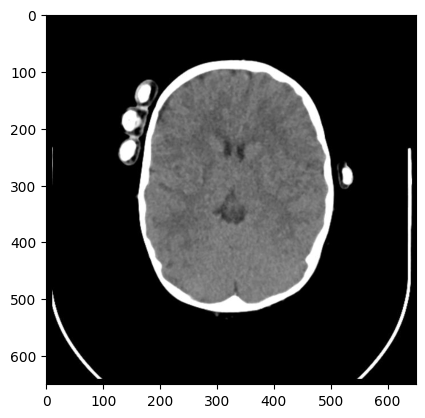

In [ ]:

import imageio.v2 as imageio
import matplotlib.pyplot as plt

image = imageio.imread(f'{STROKE_PATH}/67 (15).jpg')
plt.imshow(image, cmap="gray")

In [ ]:
from scipy import ndimage
from skimage import morphology
import numpy as np

def remove_noise(image, display=False):
  """Remove slice noise"""
  # morphology.dilation creates a segmentation of the image
  # If one pixel is between the origin and the edge of a square of size
  # 3x3, the pixel belongs to the same class
  segmentation = morphology.dilation(image, np.ones((3, 3)))
  segmentation[segmentation < 25] = 0
  segmentation[segmentation > 25] = 1
  labels, label_nb = ndimage.label(segmentation)
  label_count = np.bincount(labels.ravel().astype(int))

  # The size of label_count is the number of classes/segmentations found.
  # The first class is not used since it's the background.
  label_count[0] = 0

  # A mask with the class with more pixels is created
  # since it should represent the brain
  mask = labels == label_count.argmax()

  # Improve the brain mask
  mask = morphology.dilation(mask, np.ones((5, 5)))
  mask = ndimage.binary_fill_holes(mask)
  mask = morphology.dilation(mask, np.ones((3, 3)))

  # Since the pixels in the mask are zeros and ones,
  # it is possible to multiple the original image to only keep the brain region
  masked_image = mask * image

  if display:
    plt.figure(figsize=(10, 2.5))
    plt.subplot(141)
    plt.imshow(image, cmap=plt.cm.bone)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(142)
    plt.imshow(mask, cmap=plt.cm.bone)
    plt.title('Mask')
    plt.axis('off')

    plt.subplot(143)
    plt.imshow(masked_image, cmap=plt.cm.bone)
    plt.title('Clean Image')
    plt.axis('off')

  return masked_image

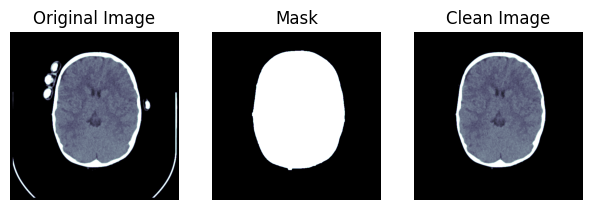

In [ ]:
denoised_image = remove_noise(image, display=True)


In [ ]:
import numpy as np
from tqdm import tqdm


def resize_scan(scan):
  """Resize the CT scan to a desired uniform size across all axis"""
  # Set the desired depth
  desired_depth = 64
  desired_width = 128
  desired_height = 128
  # Get current depth
  current_depth = scan.shape[-1]
  current_width = scan.shape[0]
  current_height = scan.shape[1]
  # Compute depth factor
  depth = current_depth / desired_depth
  width = current_width / desired_width
  height = current_height / desired_height
  depth_factor = 1 / depth
  width_factor = 1 / width
  height_factor = 1 / height
  # Rotate
  scan = ndimage.rotate(scan, 90, reshape=False)
  # Resize across z-axis
  scan = ndimage.zoom(scan, (width_factor, height_factor, depth_factor), order=1)
  return scan


def normalize_scan(scan):
  """Normalize the scan to the interval [0, 1]"""
  min = 0
  max = 255
  scan[scan < min] = min
  scan[scan > max] = max
  scan = (scan - min) / (max - min)
  scan = scan.astype("float32")
  return scan


def merge_slices(path, patient_id, slice_count, denoise=False):
  """Merge all the slices for a patient into a scan"""
  if denoise:
    scan = tuple(remove_noise(imageio.imread(f'{path}/{patient_id} ({slice_id}).jpg')) for slice_id in range(1, slice_count+1))
  else:
    scan = tuple(imageio.imread(f'{path}/{patient_id} ({slice_id}).jpg') for slice_id in range(1, slice_count+1))

  return np.dstack(scan)


def count_slices(path):
  """Analyze the slices path and returns a dictionary with the slices count associated to each patient"""
  slice_dict = {}
  for dirname, _, filenames in os.walk(path):
      for filename in filenames:
        patient_id = int(filename.split()[0])
        if patient_id not in slice_dict:
          slice_dict[patient_id] = 1
        else:
          slice_dict[patient_id] = slice_dict[patient_id] + 1

  return slice_dict


def collect_scan(path, patient_id, slice_count):
  """Collect a scan for a patient id"""
  # Get a single CT scan by merging all the slices from a single patient
  # Before getting merged the slices are also denoised
  scan = merge_slices(path, patient_id, slice_count, denoise=True)

  # Normalize the CT scan to the interval [0, 1]
  scan = normalize_scan(scan)

  # Resize the CT scan to uniform the size
  scan = resize_scan(scan)

  return scan


def load_dataset(path):
  """Return the scans dataset as a 4D array"""
  # Get a dictionary with patient IDs and slice count per patient
  slices_dict = count_slices(path)

  # Collect scans for each patient id
  dataset = np.array([collect_scan(path, patient_id, slice_count) for patient_id, slice_count in tqdm(slices_dict.items())])

  return dataset


In [ ]:

normal_dataset = load_dataset(path=NORMAL_PATH)
stroke_dataset = load_dataset(path=STROKE_PATH)


100%|██████████| 31/31 [01:43<00:00,  3.35s/it]


In [ ]:
normal_dataset.shape, stroke_dataset.shape


((51, 128, 128, 64), (31, 128, 128, 64))

In [ ]:
normal_dataset.shape, stroke_dataset.shape
def plot_scan_from_dataset(num_rows, num_columns, width, height, data, title):
  """Plot a scan from dataset"""
  data = np.transpose(data)
  data = np.reshape(data, (num_rows, num_columns, width, height))
  rows_data, columns_data = data.shape[0], data.shape[1]
  heights = [slc[0].shape[0] for slc in data]
  widths = [slc.shape[1] for slc in data[0]]
  fig_width = 12.0
  fig_height = fig_width * sum(heights) / sum(widths)
  f, axarr = plt.subplots(
      rows_data,
      columns_data,
      figsize=(fig_width, fig_height),
      gridspec_kw={"height_ratios": heights},
  )
  f.suptitle(title, y=1.1)
  for i in range(rows_data):
      for j in range(columns_data):
          axarr[i, j].imshow(data[i][j], cmap="gray")
          axarr[i, j].axis("off")
  plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
  plt.show()

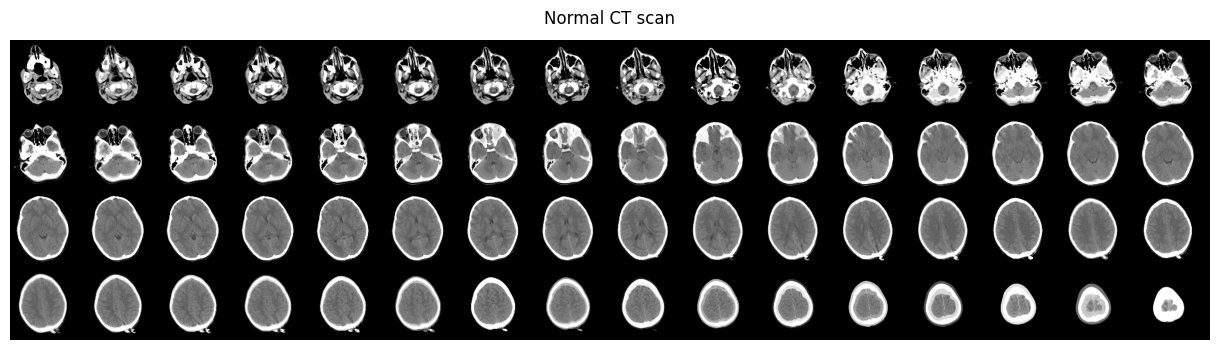

In [ ]:
plot_scan_from_dataset(4, 16, 128, 128, normal_dataset[0, :, :, :], "Normal CT scan")


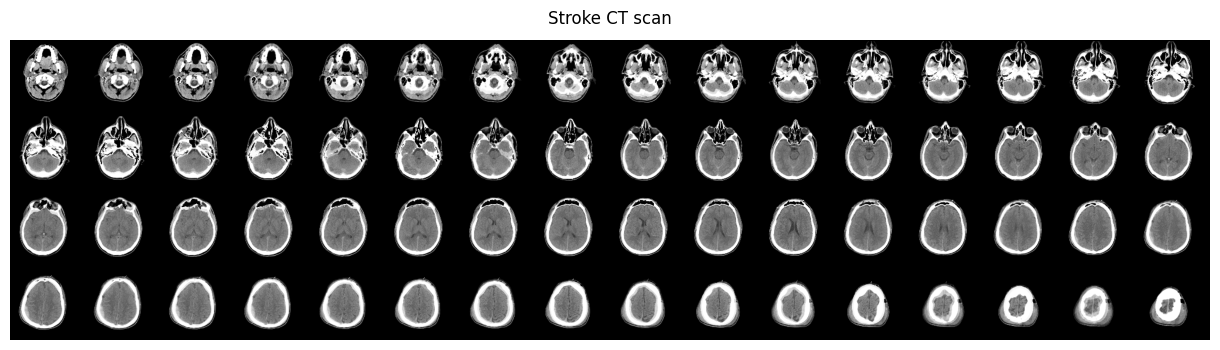

In [ ]:
plot_scan_from_dataset(4, 16, 128, 128, stroke_dataset[0, :, :, :], "Stroke CT scan")


In [ ]:
# For the CT scans having presence of stroke assign 1 otherwise 0.
normal_labels = np.array([0 for _ in range(len(normal_dataset))])
stroke_labels = np.array([1 for _ in range(len(stroke_dataset))])

# Split data in the ratio 70%-30% for training and validation.
import math
VALIDATION_SPLIT = 0.7
normal_train_len = math.ceil(VALIDATION_SPLIT*len(normal_labels))
stroke_train_len = math.ceil(VALIDATION_SPLIT*len(stroke_labels))
x_train = np.concatenate((normal_dataset[:normal_train_len], stroke_dataset[:stroke_train_len]), axis=0)
y_train = np.concatenate((normal_labels[:normal_train_len], stroke_labels[:stroke_train_len]), axis=0)
x_val = np.concatenate((normal_dataset[normal_train_len:], stroke_dataset[stroke_train_len:]), axis=0)
y_val = np.concatenate((normal_labels[normal_train_len:], stroke_labels[stroke_train_len:]), axis=0)

print(f"Training samples")
print(f"Normal: {normal_train_len}")
print(f"Stroke: {stroke_train_len}")
print(f"Total: {x_train.shape[0]}")
print()
print(f"Validation samples")
print(f"Normal: {len(normal_dataset) - normal_train_len}")
print(f"Stroke: {len(stroke_dataset) - stroke_train_len}")
print(f"Total: {x_val.shape[0]}")


Training samples
Normal: 36
Stroke: 22
Total: 58

Validation samples
Normal: 15
Stroke: 9
Total: 24


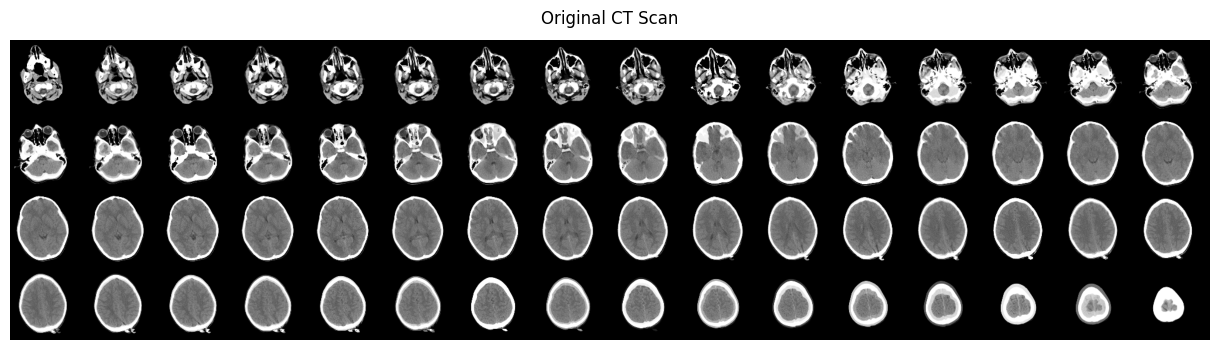

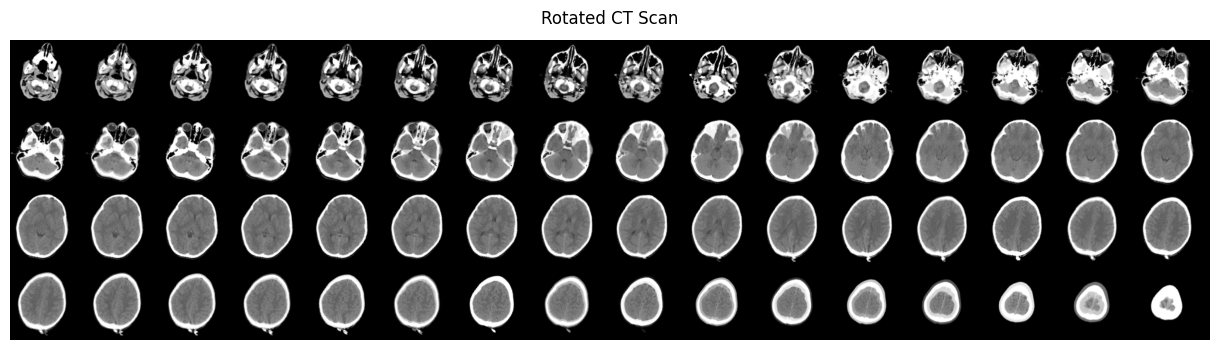

In [ ]:
rotation_layer = tf.keras.layers.RandomRotation(factor=(-0.125, 0.125), fill_mode='constant', fill_value=0)

plot_scan_from_dataset(4, 16, 128, 128, x_train[0, :, :, :], "Original CT Scan")
plot_scan_from_dataset(4, 16, 128, 128, rotation_layer(x_train[0, :, :, :]), "Rotated CT Scan")


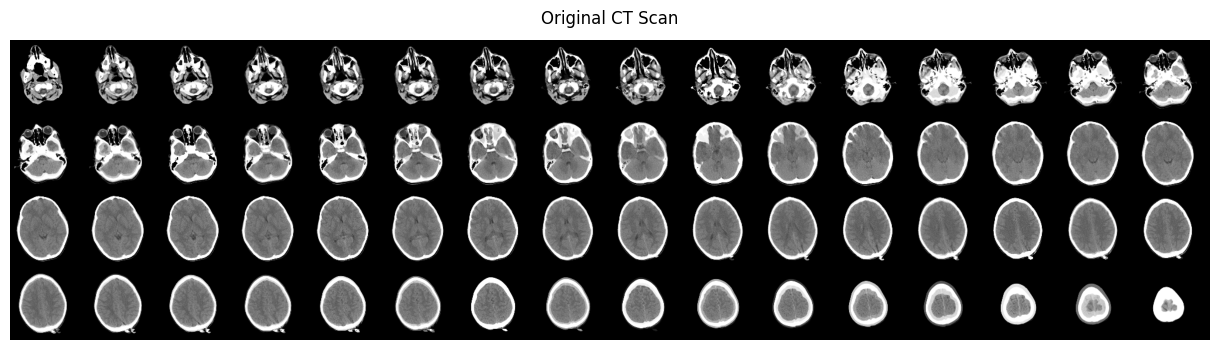

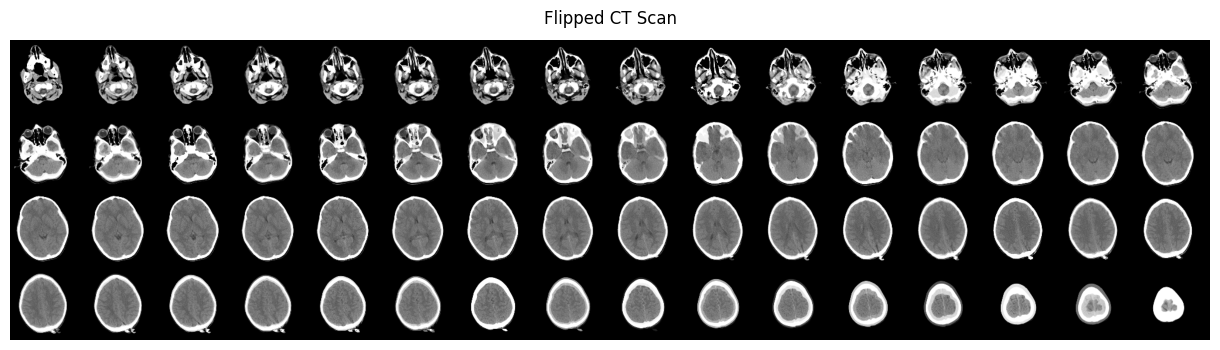

In [ ]:
flipping_layer = tf.keras.layers.RandomFlip(mode='vertical')

plot_scan_from_dataset(4, 16, 128, 128, x_train[0, :, :, :], "Original CT Scan")
plot_scan_from_dataset(4, 16, 128, 128, flipping_layer(x_train[0, :, :, :]), "Flipped CT Scan")


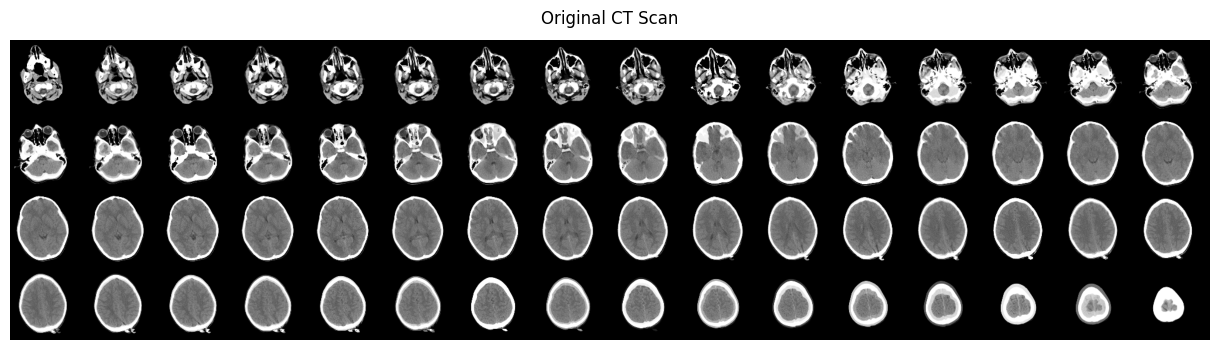

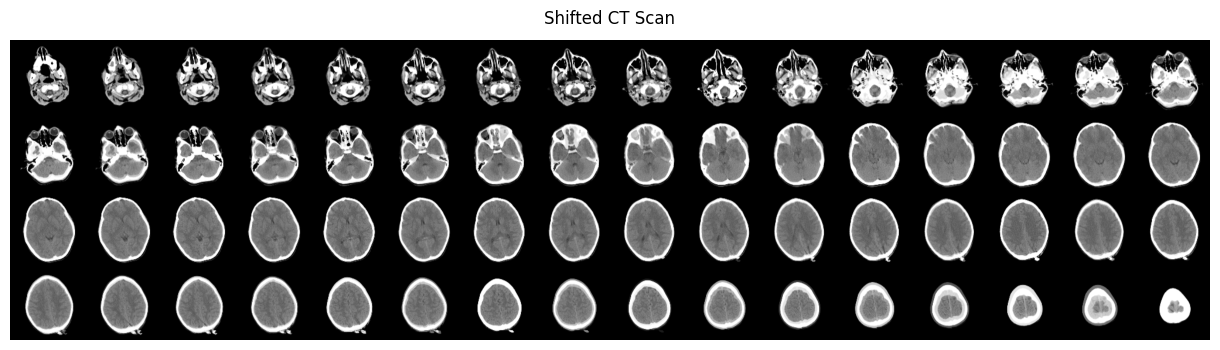

In [ ]:
shifting_layer = tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2, fill_mode='constant', fill_value=0)

plot_scan_from_dataset(4, 16, 128, 128, x_train[0, :, :, :], "Original CT Scan")
plot_scan_from_dataset(4, 16, 128, 128, shifting_layer(x_train[0, :, :, :]), "Shifted CT Scan")

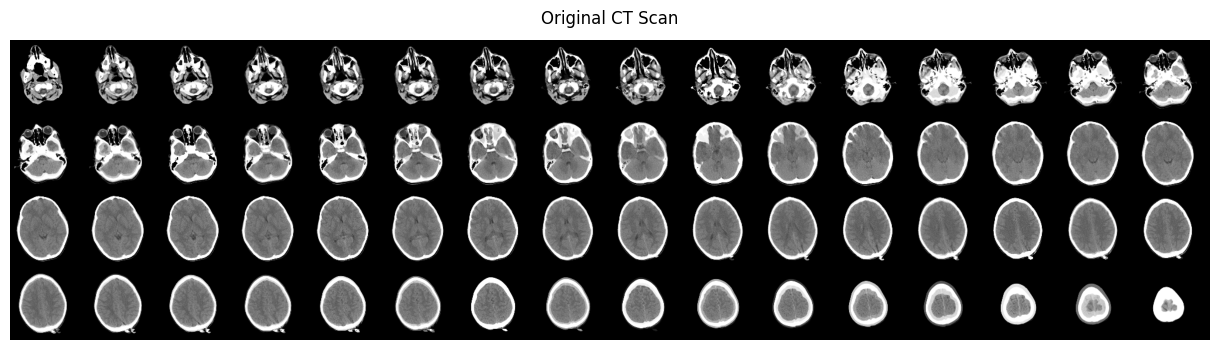

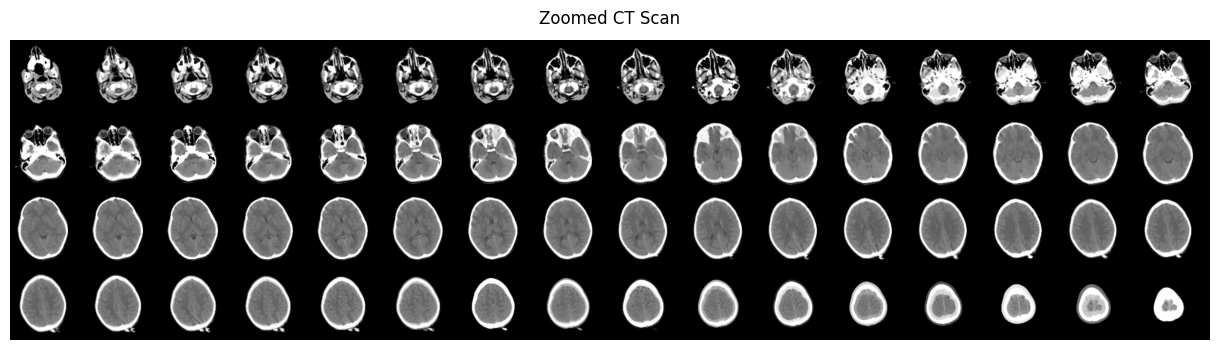

In [ ]:
zoom_layer = tf.keras.layers.RandomZoom(height_factor=0.15, fill_mode='constant', fill_value=0)

plot_scan_from_dataset(4, 16, 128, 128, x_train[0, :, :, :], "Original CT Scan")
plot_scan_from_dataset(4, 16, 128, 128, zoom_layer(x_train[0, :, :, :]), "Zoomed CT Scan")

In [ ]:
!pip install keras_cv


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.1/613.1 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 54.3 MB/s eta 0:00:00


Using TensorFlow backend


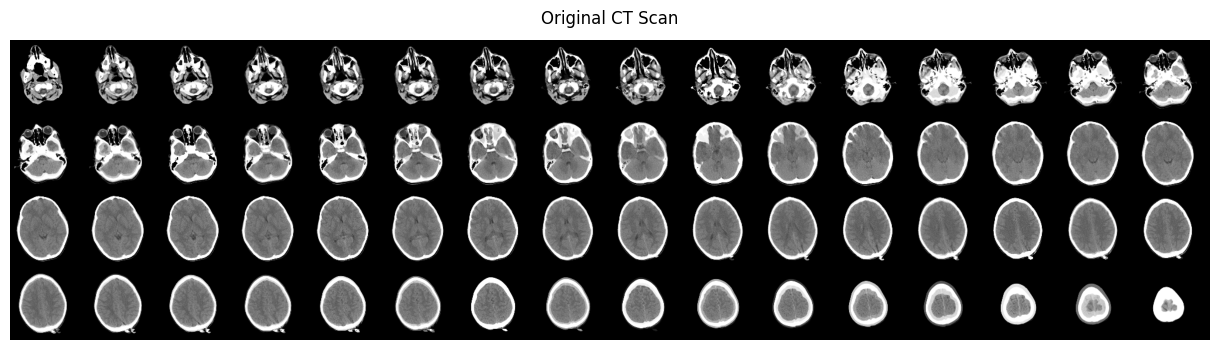

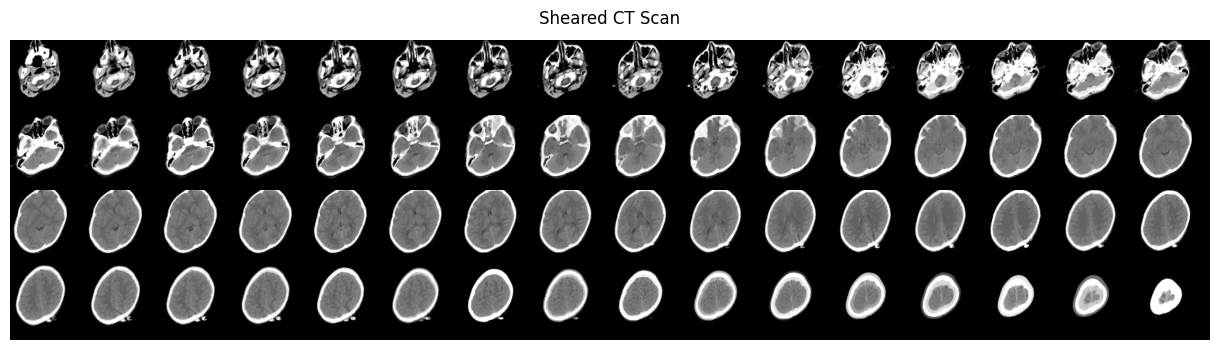

In [ ]:

import keras_cv

shear_layer = keras_cv.layers.RandomShear(x_factor=(0, 0.3), y_factor=(0, 0.3), interpolation="bilinear", fill_mode="nearest", fill_value=0.0)

plot_scan_from_dataset(4, 16, 128, 128, x_train[0, :, :, :], "Original CT Scan")
plot_scan_from_dataset(4, 16, 128, 128, shear_layer(x_train[0, :, :, :]), "Sheared CT Scan")


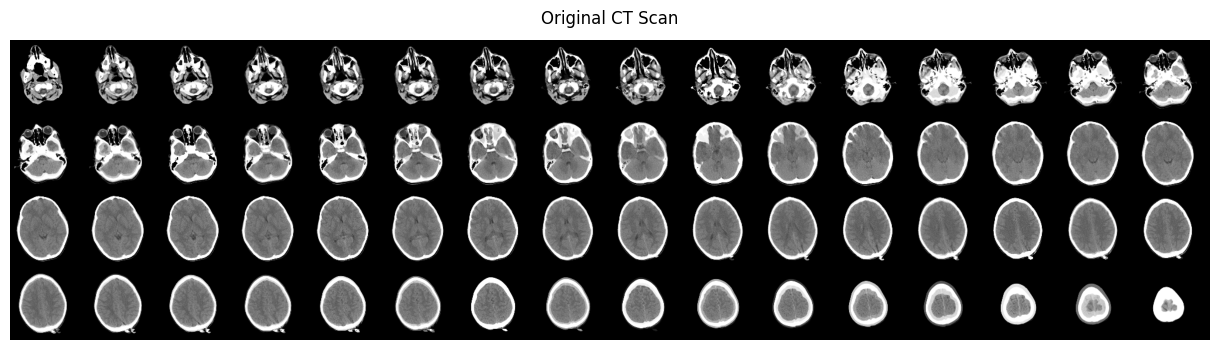

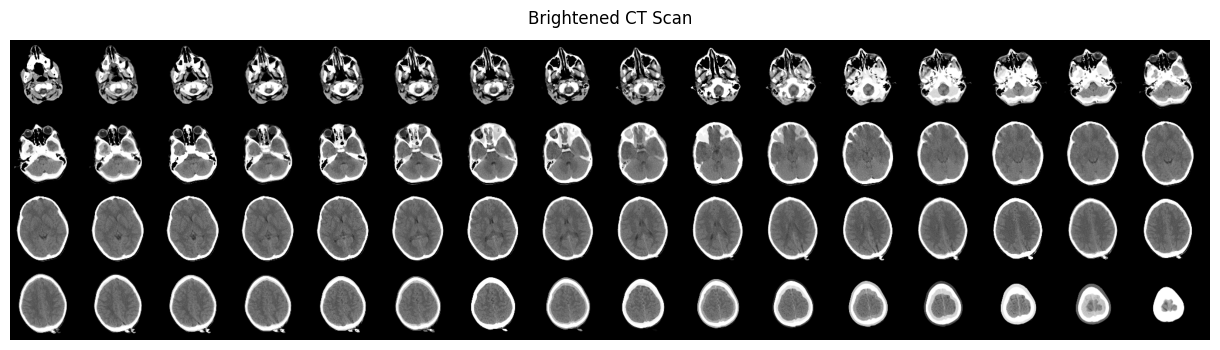

In [ ]:
brighteness_layer = tf.keras.layers.RandomBrightness(factor=0.1, value_range=[0.0, 1.0])

plot_scan_from_dataset(4, 16, 128, 128, x_train[0, :, :, :], "Original CT Scan")
plot_scan_from_dataset(4, 16, 128, 128, brighteness_layer(x_train[0, :, :, :]), "Brightened CT Scan")


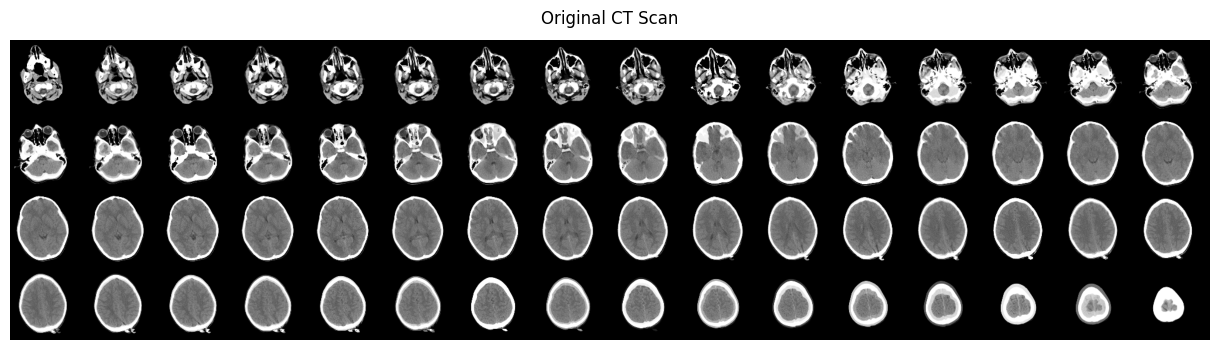

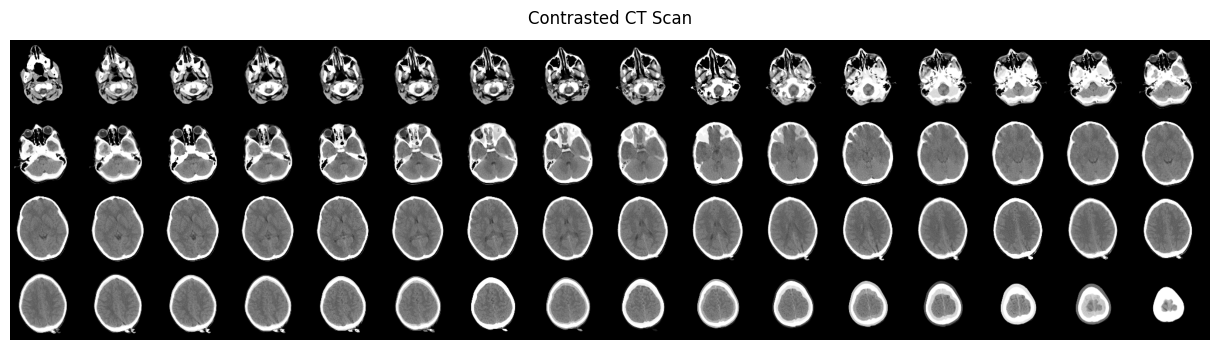

In [ ]:

contrast_layer = tf.keras.layers.RandomContrast(factor=(0, 1.2))

plot_scan_from_dataset(4, 16, 128, 128, x_train[0, :, :, :], "Original CT Scan")
plot_scan_from_dataset(4, 16, 128, 128, contrast_layer(x_train[0, :, :, :]), "Contrasted CT Scan")

In [ ]:

# Set TensorFlow random seed
tf.random.set_seed(42)

# Define data loaders
training_loader = tf.data.Dataset.from_tensor_slices((x_train, y_train))
validation_loader = tf.data.Dataset.from_tensor_slices((x_val, y_val))

# Define batch size
batch_size = 2

# Training dataset
training_dataset = (
    training_loader.shuffle(len(x_train))
    .batch(batch_size)
    .prefetch(2)
)

# Validation dataset
validation_dataset = (
    validation_loader.shuffle(len(x_val))
    .batch(batch_size)
    .prefetch(2)
)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Default arguments
WIDTH=128
HEIGHT=128
DEPTH=64
INITIAL_LEARNING_RATE=0.0001
DECAY_STEPS=100000
DECAY_RATE=0.96

# Performance metrics
METRICS=[
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def build_model(width=WIDTH,
                height=HEIGHT,
                depth=DEPTH,
                initial_learning_rate=INITIAL_LEARNING_RATE,
                decay_steps=DECAY_STEPS,
                decay_rate=DECAY_RATE,
                metrics=METRICS,
                augmentation=False,
                rotation=False,
                flip=False,
                shift=False,
                zoom=False,
                shear=False,
                brightness=False,
                contrast=False):
  """Build a 3D convolutional neural network model with augmentation layers"""

  # Define the model
  model = keras.Sequential()
  model.add(keras.Input((width, height, depth)))

  # (Optionally) Add augmentation layers
  if augmentation:
    if rotation:
      model.add(layers.RandomRotation(factor=(-0.125, 0.125), fill_mode='constant', fill_value=0))
    if flip:
      model.add(layers.RandomFlip(mode='vertical'))
    if shift:
      model.add(layers.RandomTranslation(height_factor=0.2, width_factor=0.2, fill_mode='constant', fill_value=0))
    if zoom:
      model.add(layers.RandomZoom(height_factor=0.15, fill_mode='constant', fill_value=0))
    if shear:
      model.add(keras_cv.layers.RandomShear(x_factor=(0, 0.3), y_factor=(0, 0.3), interpolation="bilinear", fill_mode="nearest", fill_value=0.0))
    if brightness:
      model.add(layers.RandomBrightness(factor=0.1, value_range=[0.0, 1.0]))
    if contrast:
      model.add(layers.RandomContrast(factor=(0, 1.2)))

  # Add a dimension to perform 3D convolutions
  model.add(layers.Reshape(target_shape=(width, height, depth, 1)))

  model.add(layers.Conv3D(filters=64, kernel_size=3, activation="relu"))
  model.add(layers.MaxPool3D(pool_size=2))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv3D(filters=64, kernel_size=3, activation="relu"))
  model.add(layers.MaxPool3D(pool_size=2))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv3D(filters=128, kernel_size=3, activation="relu"))
  model.add(layers.MaxPool3D(pool_size=2))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv3D(filters=256, kernel_size=3, activation="relu"))
  model.add(layers.MaxPool3D(pool_size=2))
  model.add(layers.BatchNormalization())

  model.add(layers.GlobalAveragePooling3D())
  model.add(layers.Dense(units=512, activation="relu"))
  model.add(layers.Dropout(0.3))

  model.add(layers.Dense(units=1, activation="sigmoid"))

  # Define the optimizer
  lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=decay_steps, decay_rate=decay_rate, staircase=True
  )

  # Compile the model
  model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=metrics,
  )

  return model

In [ ]:
# Build the model with default parameters
model = build_model()

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 128, 128, 64, 1)   0         
                                                                 
 conv3d (Conv3D)             (None, 126, 126, 62, 64   1792      
                             )                                   
                                                                 
 max_pooling3d (MaxPooling3  (None, 63, 63, 31, 64)    0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 63, 63, 31, 64)    256       
 Normalization)                                                  
                                                                 
 conv3d_1 (Conv3D)           (None, 61, 61, 29, 64)    110656    
                                                        

In [ ]:
# Default epochs number
EPOCHS=150

# Callback
CHECKPOINT_CB = keras.callbacks.ModelCheckpoint(
    "ct-scan-brain-stroke-detection-{epoch:03d}-{val_auc:.4f}.h5",
    save_best_only=True,
    monitor='val_auc',
    mode='max'
)

# Model training function
def train_model(model, training_dataset, validation_dataset, epochs=EPOCHS, callbacks=[CHECKPOINT_CB]):
  """Train a model doing validation at the end of each epoch"""
  history = model.fit(
    training_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    shuffle=True,
    verbose=1,
    callbacks=callbacks
  )

  return history

In [ ]:
performance = {}

In [ ]:
model = build_model()

performance["absent"] = train_model(model, training_dataset, validation_dataset)

Epoch 1/150
29/29 [==============================] - 24s 249ms/step - loss: 0.6800 - tp: 3.0000 - fp: 4.0000 - tn: 32.0000 - fn: 19.0000 - accuracy: 0.6034 - precision: 0.4286 - recall: 0.1364 - auc: 0.4451 - prc: 0.3629 - val_loss: 0.6677 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 15.0000 - val_fn: 9.0000 - val_accuracy: 0.6250 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4222 - val_prc: 0.3382
Epoch 2/150


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 5s 183ms/step - loss: 0.6506 - tp: 4.0000 - fp: 4.0000 - tn: 32.0000 - fn: 18.0000 - accuracy: 0.6207 - precision: 0.5000 - recall: 0.1818 - auc: 0.5455 - prc: 0.4261 - val_loss: 0.6615 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 15.0000 - val_fn: 9.0000 - val_accuracy: 0.6250 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5556 - val_prc: 0.5004
Epoch 3/150
29/29 [==============================] - 5s 183ms/step - loss: 0.6169 - tp: 9.0000 - fp: 8.0000 - tn: 28.0000 - fn: 13.0000 - accuracy: 0.6379 - precision: 0.5294 - recall: 0.4091 - auc: 0.6900 - prc: 0.5437 - val_loss: 0.7136 - val_tp: 9.0000 - val_fp: 15.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3750 - val_precision: 0.3750 - val_recall: 1.0000 - val_auc: 0.5259 - val_prc: 0.4630
Epoch 4/150
29/29 [==============================] - 5s 183ms/step - loss: 0.6311 - tp: 7.0000 - fp: 8.0000 - tn: 28.0000 - fn: 15.0000 - accuracy: 0.6034 - precisi

In [ ]:
model = build_model(augmentation=True,
                    rotation=False,
                    flip=False,
                    shift=False,
                    zoom=False,
                    shear=False,
                    brightness=True,
                    contrast=True)

performance["basic"] = train_model(model, training_dataset, validation_dataset)

Epoch 1/150
29/29 [==============================] - 10s 227ms/step - loss: 0.7110 - tp: 16.0000 - fp: 19.0000 - tn: 32.0000 - fn: 15.0000 - accuracy: 0.5854 - precision: 0.4571 - recall: 0.5161 - auc: 0.5323 - prc: 0.3836 - val_loss: 0.6666 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 15.0000 - val_fn: 9.0000 - val_accuracy: 0.6250 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5778 - val_prc: 0.4844
Epoch 2/150
29/29 [==============================] - 5s 188ms/step - loss: 0.6710 - tp: 10.0000 - fp: 9.0000 - tn: 27.0000 - fn: 12.0000 - accuracy: 0.6379 - precision: 0.5263 - recall: 0.4545 - auc: 0.5941 - prc: 0.5584 - val_loss: 0.6737 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 15.0000 - val_fn: 9.0000 - val_accuracy: 0.6250 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6556 - val_prc: 0.4836
Epoch 3/150
29/29 [==============================] - 5s 187ms/step - loss: 0.6436 - tp: 10.0000 - fp: 5.0000 - tn: 31.0000 - fn: 12.0000 - a

In [ ]:
model = build_model(augmentation=True,
                    rotation=True,
                    flip=True,
                    shift=True,
                    zoom=False,
                    shear=False,
                    brightness=True,
                    contrast=True)

performance["intermediate"] = train_model(model, training_dataset, validation_dataset)

Epoch 1/150
29/29 [==============================] - 11s 212ms/step - loss: 0.7177 - tp: 15.0000 - fp: 28.0000 - tn: 23.0000 - fn: 16.0000 - accuracy: 0.4634 - precision: 0.3488 - recall: 0.4839 - auc: 0.4377 - prc: 0.3420 - val_loss: 0.7271 - val_tp: 9.0000 - val_fp: 15.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3750 - val_precision: 0.3750 - val_recall: 1.0000 - val_auc: 0.3593 - val_prc: 0.2936
Epoch 2/150
29/29 [==============================] - 6s 192ms/step - loss: 0.6597 - tp: 6.0000 - fp: 10.0000 - tn: 26.0000 - fn: 16.0000 - accuracy: 0.5517 - precision: 0.3750 - recall: 0.2727 - auc: 0.5909 - prc: 0.4098 - val_loss: 0.8159 - val_tp: 9.0000 - val_fp: 15.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3750 - val_precision: 0.3750 - val_recall: 1.0000 - val_auc: 0.4000 - val_prc: 0.3243
Epoch 3/150
29/29 [==============================] - 6s 193ms/step - loss: 0.7004 - tp: 6.0000 - fp: 10.0000 - tn: 26.0000 - fn: 16.0000 - accuracy: 0.5517 

In [ ]:

model = build_model(augmentation=True,
                    rotation=True,
                    flip=True,
                    shift=True,
                    zoom=True,
                    shear=True,
                    brightness=True,
                    contrast=True)

performance["advanced"] = train_model(model, training_dataset, validation_dataset)

Epoch 1/150
29/29 [==============================] - 11s 216ms/step - loss: 0.7030 - tp: 17.0000 - fp: 28.0000 - tn: 23.0000 - fn: 14.0000 - accuracy: 0.4878 - precision: 0.3778 - recall: 0.5484 - auc: 0.5060 - prc: 0.4018 - val_loss: 0.6824 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 15.0000 - val_fn: 9.0000 - val_accuracy: 0.6250 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6222 - val_prc: 0.4549
Epoch 2/150
29/29 [==============================] - 6s 211ms/step - loss: 0.6839 - tp: 9.0000 - fp: 15.0000 - tn: 21.0000 - fn: 13.0000 - accuracy: 0.5172 - precision: 0.3750 - recall: 0.4091 - auc: 0.5619 - prc: 0.4881 - val_loss: 0.7414 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 15.0000 - val_fn: 9.0000 - val_accuracy: 0.6250 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4444 - val_prc: 0.3354
Epoch 3/150
29/29 [==============================] - 5s 190ms/step - loss: 0.7212 - tp: 7.0000 - fp: 13.0000 - tn: 23.0000 - fn: 15.0000 - a

In [ ]:
model.save('my_model.h5')

In [ ]:
from google.colab import files

 Download the model weights file
files.download('my_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

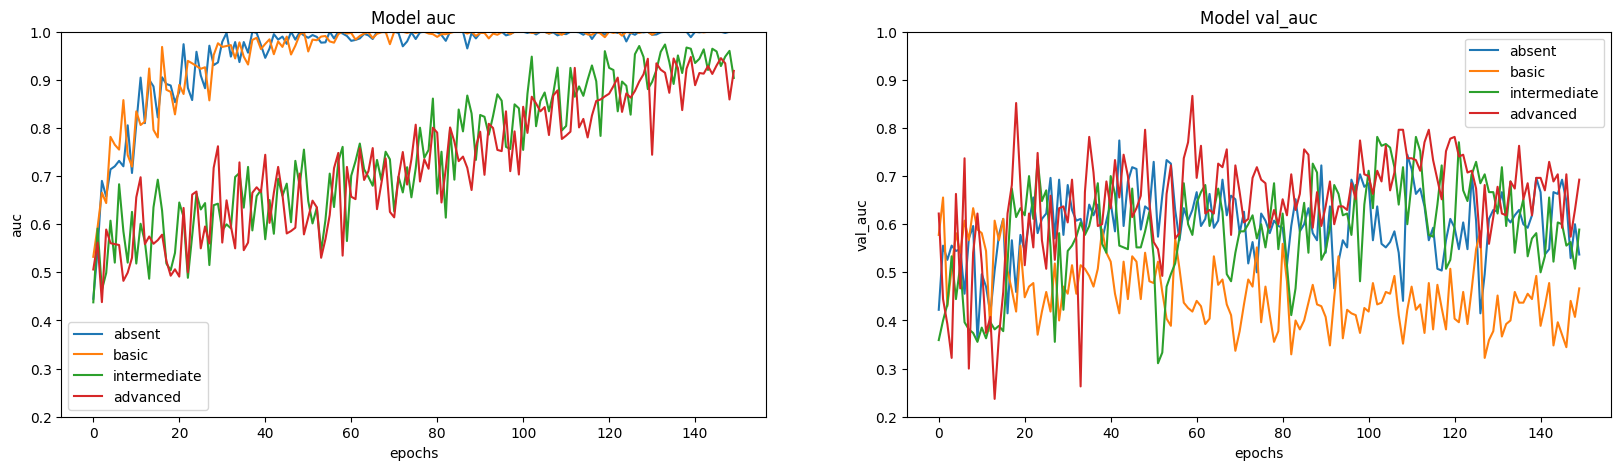

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax = ax.ravel()

for i, metric in enumerate(["auc", "val_auc"]):
  for label, history in performance.items():
    ax[i].plot(history.history[metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(metric)
    ax[i].set_ylim([0.2, 1])
    ax[i].legend(performance.keys())
